In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

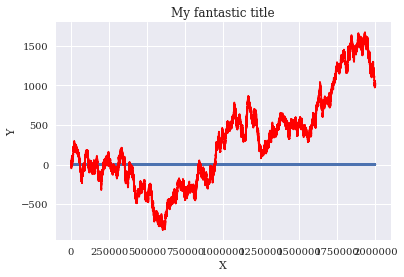

In [3]:
import numpy as np
import random

np.random.seed(random.randint(0, 10000))
y = np.random.standard_normal(2000000)

x = np.arange(len(y))
plt.title("My fantastic title")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y);
plt.plot(y.cumsum(),'r');

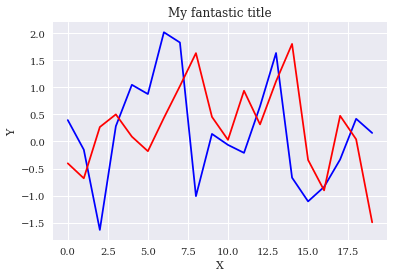

In [4]:
np.random.seed(random.randint(0, 10000))
y = np.random.standard_normal((7, 20))

x = np.arange(len(y))
plt.title("My fantastic title")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(y[0],'b');
plt.plot(y[1],'r');

Text(0,0.5,'value')

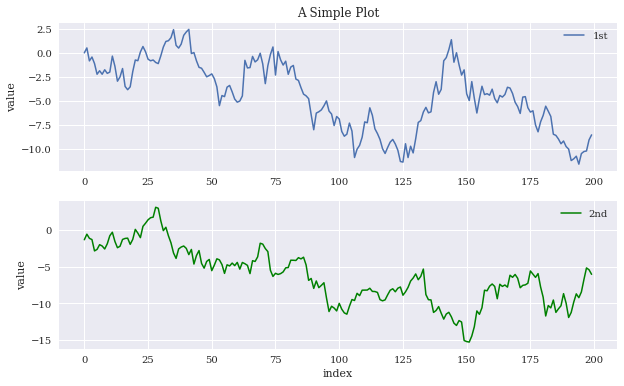

In [5]:
np.random.seed(random.randint(0, 10000))
y = np.random.standard_normal((200, 2))

plt.figure(figsize=(10, 6))
plt.subplot(211)  
plt.plot(y[:, 0].cumsum(), lw=1.5, label='1st')
# plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)  
plt.plot(y[:, 1].cumsum(), 'g', lw=1.5, label='2nd')
# plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')




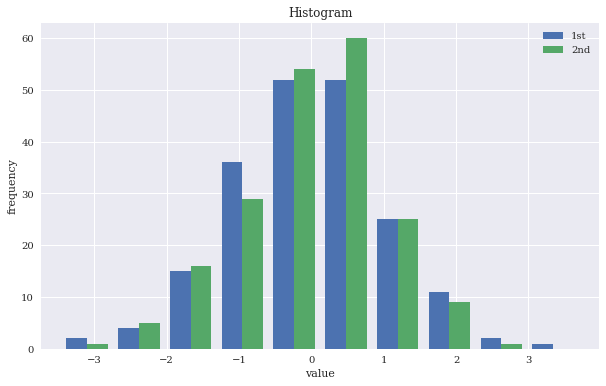

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=10)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

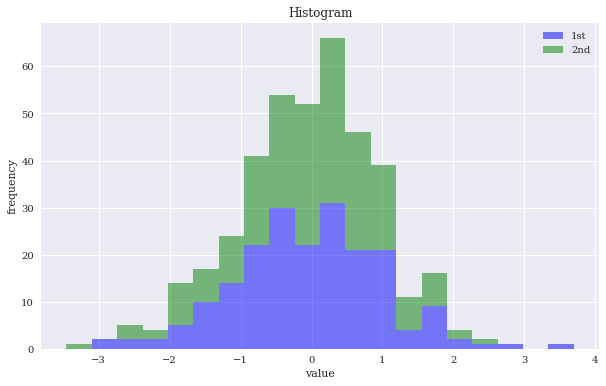

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
         stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

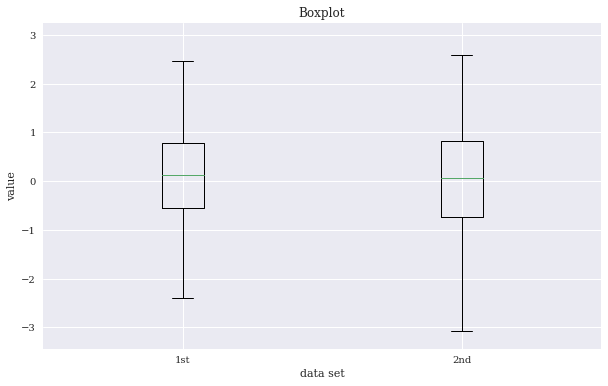

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y) 
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot');

In [6]:
import numpy as np

def func(x):
    return 0.5 * np.exp(x) + 1


a, b = 0.5, 1.5 
x = np.linspace(0, 2, 100)
y = func(x)
# print(x)
# print(y)
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)] 


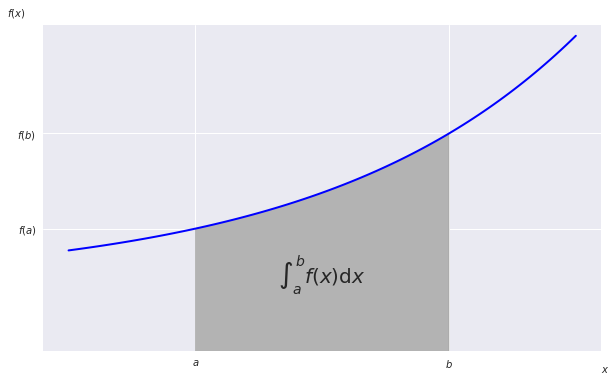

In [7]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x)\mathrm{d}x$',
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'));

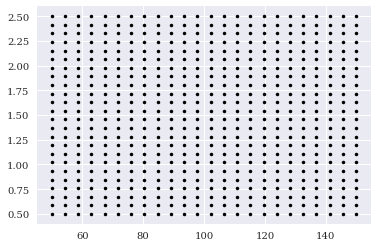

In [8]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
plt.plot(strike, ttm, marker = '.', color='k', linestyle='none')

In [10]:

import math
# iv = (strike - 100) ** 2 / (100 * strike) / ttm

iv = (np.sin(strike**2 + ttm**2) / (strike**2 + ttm**2))

# iv[:5, :3]

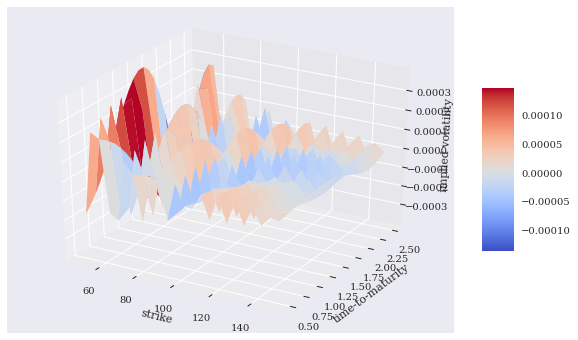

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

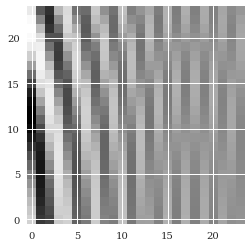

In [36]:
plt.imshow(iv, origin='lower', interpolation='none')
plt.show()

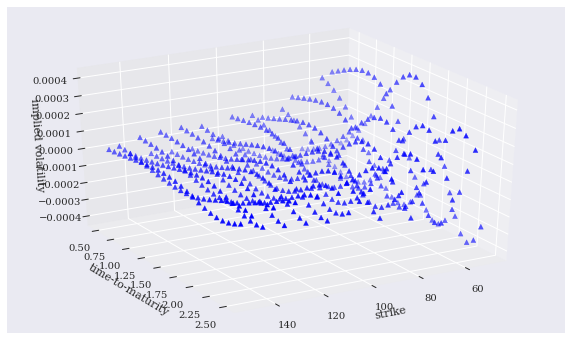

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');

In [3]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)


<script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script><script type="text/javascript">if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}</script><script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window._Plotly) {require(['plotly'],function(plotly) {window._Plotly=plotly;});}</script>

In [71]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0) 

index = pd.date_range('2019-1-1', 
freq='B', 
periods=len(a)) 

df = pd.DataFrame(100 + 5 * a, 
columns=list('abcde'), 
index=index) 

print(df.head()) 

                     a           b           c           d           e
2019-01-01  103.251331   97.711179  104.208178  100.760631  102.014875
2019-01-02  100.681139  100.630724  102.010182   93.767197  104.021220
2019-01-03   96.129049  103.969003  106.558348   95.211976   90.261051
2019-01-04   96.625184  112.032557  102.846920   90.407660   91.595593
2019-01-07   99.569516  113.893746  114.948983   92.359397   87.227971


In [13]:

plyo.iplot(
    df.iplot(asFigure=True),
    # image='png', 
    filename='/notebooks/data/ply_01' 
)


NameError: name 'df' is not defined

In [17]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np

py.offline.init_notebook_mode(connected=True)

x = np.linspace(0, np.pi, 1000)

layout = go.Layout(
    title = "Mytitle",
    yaxis = dict(
        title='volts'
    ),
    xaxis = dict(
        title="ns"
    ),
)

trace1 = go.Scatter (
    x=x,
    y=np.sin(x),
    mode='lines',
) 

fig = go.Figure(data=[trace1], layout=layout)

py.offline.iplot(fig)

# py.offline.iplot({
#     "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
#     "layout": go.Layout(title="hello world")
# })

<script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script><script type="text/javascript">if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}</script><script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window._Plotly) {require(['plotly'],function(plotly) {window._Plotly=plotly;});}</script>

<div id="161f54b2-78e4-48ef-a1e5-495fc88aa917" style="height: 525px; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">require(["plotly"], function(Plotly) { window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("161f54b2-78e4-48ef-a1e5-495fc88aa917", [{"mode": "lines", "x": [0.0, 0.0031447373909807737, 0.006289474781961547, 0.009434212172942321, 0.012578949563923095, 0.01572368695490387, 0.018868424345884642, 0.022013161736865416, 0.02515789912784619, 0.028302636518826963, 0.03144737390980774, 0.034592111300788514, 0.037736848691769284, 0.040881586082750054, 0.04402632347373083, 0.04717106086471161, 0.05031579825569238, 0.05346053564667315, 0.056605273037653926, 0.0597500104286347, 0.06289474781961547, 0.06603948521059624, 0.06918422260157703, 0.0723289599925578, 0.07547369738353857, 0.07861843477451934, 0.08176317216550011, 0.08490790955648089, 0.08805264694746166, 0.09119738433844243, 0.09434212172942322, 0.09748685912040399, 0.10063159651138476, 0.10377633390236553, 0.1069210712933463, 0.11006580868432708, 0.11321054607530785, 0.11635528346628862, 0.1195000208572694, 0.12264475824825018, 0.12578949563923095, 0.12893423303021173, 0.1320789704211925, 0.13522370781217327, 0.13836844520315406, 0.1415131825941348, 0.1446579199851156, 0.14780265737609635, 0.15094739476707714, 0.15409213215805792, 0.15723686954903868, 0.16038160694001946, 0.16352634433100022, 0.166671081721981, 0.16981581911296179, 0.17296055650394254, 0.17610529389492333, 0.1792500312859041, 0.18239476867688487, 0.18553950606786565, 0.18868424345884643, 0.1918289808498272, 0.19497371824080797, 0.19811845563178873, 0.20126319302276952, 0.2044079304137503, 0.20755266780473106, 0.21069740519571184, 0.2138421425866926, 0.21698687997767338, 0.22013161736865416, 0.22327635475963492, 0.2264210921506157, 0.2295658295415965, 0.23271056693257725, 0.23585530432355803, 0.2390000417145388, 0.24214477910551957, 0.24528951649650035, 0.2484342538874811, 0.2515789912784619, 0.25472372866944265, 0.25786846606042346, 0.2610132034514042, 0.264157940842385, 0.2673026782333658, 0.27044741562434654, 0.2735921530153273, 0.2767368904063081, 0.27988162779728887, 0.2830263651882696, 0.2861711025792504, 0.2893158399702312, 0.29246057736121195, 0.2956053147521927, 0.2987500521431735, 0.3018947895341543, 0.30503952692513503, 0.30818426431611584, 0.3113290017070966, 0.31447373909807735, 0.31761847648905817, 0.3207632138800389, 0.3239079512710197, 0.32705268866200043, 0.33019742605298125, 0.333342163443962, 0.33648690083494276, 0.33963163822592357, 0.3427763756169043, 0.3459211130078851, 0.3490658503988659, 0.35221058778984665, 0.3553553251808274, 0.3585000625718082, 0.361644799962789, 0.36478953735376973, 0.36793427474475054, 0.3710790121357313, 0.37422374952671206, 0.37736848691769287, 0.3805132243086736, 0.3836579616996544, 0.38680269909063514, 0.38994743648161595, 0.3930921738725967, 0.39623691126357746, 0.3993816486545583, 0.40252638604553903, 0.4056711234365198, 0.4088158608275006, 0.41196059821848136, 0.4151053356094621, 0.4182500730004429, 0.4213948103914237, 0.42453954778240444, 0.4276842851733852, 0.430829022564366, 0.43397375995534676, 0.4371184973463275, 0.44026323473730833, 0.4434079721282891, 0.44655270951926984, 0.44969744691025065, 0.4528421843012314, 0.45598692169221217, 0.459131659083193, 0.46227639647417373, 0.4654211338651545, 0.4685658712561353, 0.47171060864711606, 0.4748553460380968, 0.4780000834290776, 0.4811448208200584, 0.48428955821103914, 0.4874342956020199, 0.4905790329930007, 0.49372377038398146, 0.4968685077749622, 0.500013245165943, 0.5031579825569238, 0.5063027199479045, 0.5094474573388853, 0.5125921947298661, 0.5157369321208469, 0.5188816695118277, 0.5220264069028084, 0.5251711442937892, 0.52831588168477, 0.5314606190757507, 0.5346053564667316, 0.5377500938577123, 0.5408948312486931, 0.5440395686396738, 0.5471843060306546, 0.5503290434216354, 0.5534737808126162, 0.556618518203597, 0.5597632